Hola! Este es mi colab
Las imágenes las bajé desde https://mast.stsci.edu/tesscut/

El objeto que vamos a usar es: R.A. (h:m:s)05:37:09.89 Dec. (d:m:s)−80:28:08.8

In [ ]:
!python -m pip install lightkurve --upgrade

     |████████████████████████████████| 245kB 5.7MB/s 
     |████████████████████████████████| 3.9MB 37.1MB/s 
     |████████████████████████████████| 22.3MB 46.1MB/s 
     |████████████████████████████████| 256kB 45.5MB/s 
     |████████████████████████████████| 808kB 33.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 3.2MB 25.3MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-cp37-none-any.whl size=11376 sha256=defc36a2af044089740d4c14cda85f1c98654baab1ad7f62769e1bbd6dff3a0f
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
  Created wheel for oktopus: filename=oktopus-0.1.2-cp37-none-any.whl size=12780 sha256=1c0f8a0cc67faea72bae4daff37820c2aab9de8fd38b5210443ad60d783002a3
  Stored in directory: /root/.cache/pip/wheels/9b/90/81/098fc66ee56166d63c9a8fc0a9672ae7b3423396a588ec952a
  Created wheel for pyvo: filename=pyvo-1.1-cp37-none-any.whl size=801573 sha256=7f40d450b02075c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import lightkurve as lk

In [ ]:
tpf = lk.read("/content/drive/MyDrive/Proyecto Compu/tess-s0001-4-2_84.291188_-80.469120_10x10_astrocut.fits")

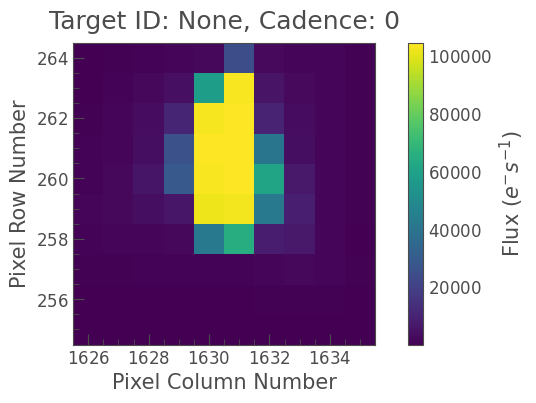

In [ ]:
%matplotlib inline
tpf.plot(frame=0);

In [ ]:
tpf

TessTargetPixelFile(TICID: None)

# Sección nueva

In [ ]:
tpf.flux.shape

(1267, 10, 10)

In [ ]:
import numpy as np

In [ ]:
mask = np.array([[False, False, False, False, False, False, False, False, False, False],  # última fila
                        [False, False, False, False, False, False, False, False, False, False],
                        [False, False, False, False, False, False, False, True, False, False],
                        [False, False, False, True, True, True, True, True, False, False],
                        [False, True, True, True, True, True, True, True, False, False],
                        [False, True, True, True, True, True, True, True, False, False],
                        [False, False, True, True, True, True, True, True, False, False],
                        [False, False, True, True, True, True, True, True, False, False],
                        [False, False, True, True, True, True, True, True, False, False],
                        [False, False, False, False, True, True, True, False, False, False]]) # Primera fila

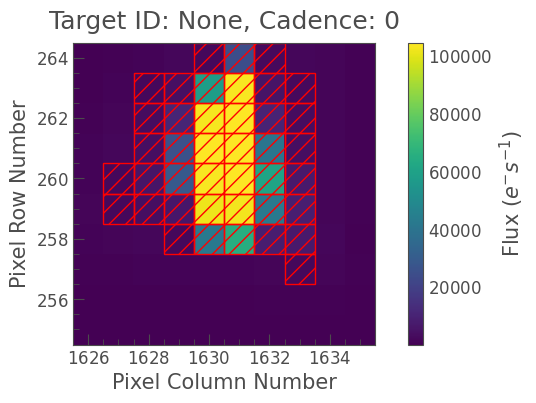

In [ ]:
tpf.plot(aperture_mask=mask);

In [ ]:
lc = tpf.to_lightcurve(aperture_mask=mask)

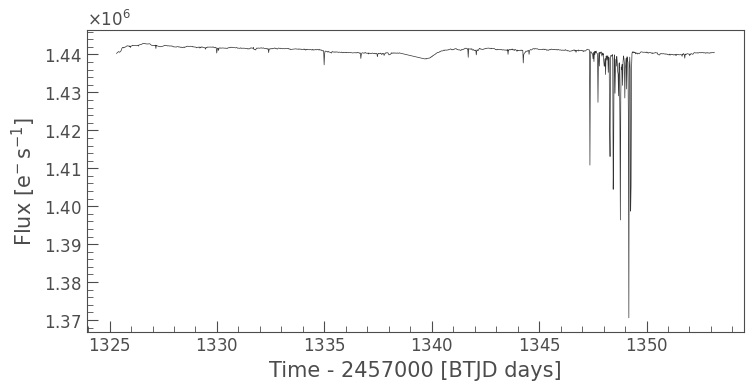

In [ ]:
lc.plot();

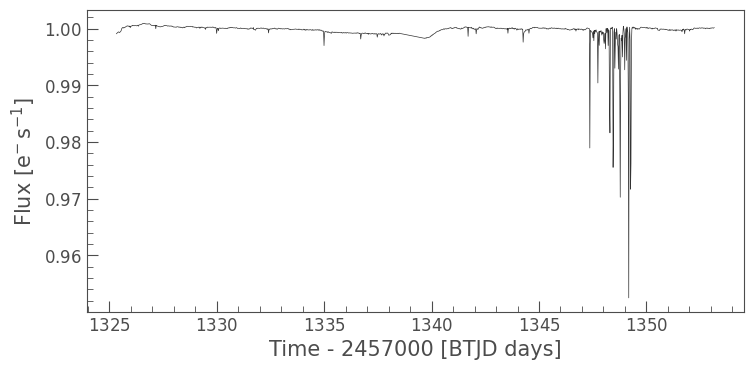

In [ ]:
flat_lc = lc.flatten(window_length=800)
flat_lc.plot();

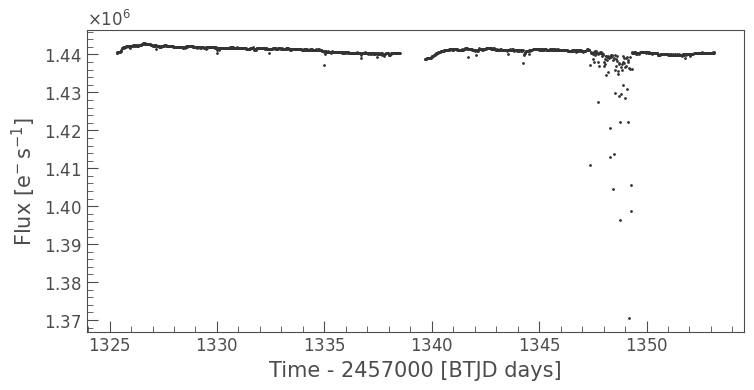

In [ ]:
lc.scatter();

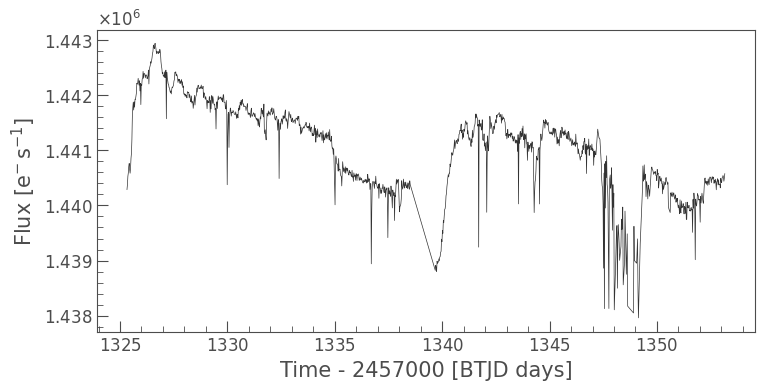

In [ ]:
lc_clean = lc.remove_outliers(sigma=4)
lc_clean.plot();


In [ ]:
from lightkurve.correctors import download_tess_cbvs

In [ ]:
cbvs = download_tess_cbvs(sector=lc.sector, camera=lc.camera, ccd=lc.ccd, cbv_type='SingleScale')

In [ ]:
cbvs

time,CADENCENO,GAP,VECTOR_1,VECTOR_2,VECTOR_3,VECTOR_4,VECTOR_5,VECTOR_6,VECTOR_7,VECTOR_8,VECTOR_9,VECTOR_10,VECTOR_11,VECTOR_12,VECTOR_13,VECTOR_14,VECTOR_15,VECTOR_16
,,,,,,,,,,,,,,,,,,
object,int32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1325.2943396288963,70444,False,-0.0004362305044196546,-0.0003363827127031982,-0.0006295092171058059,0.00043833366362378,-0.0002440345851937309,-0.0015636890893802047,0.0011034364579245448,0.0019347950583323836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.2957285172276,70445,False,0.0009007845656014979,0.0022614160552620888,-0.011929765343666077,-0.003276434261351824,-0.00957449059933424,0.009985018521547318,-0.0017225071787834167,-0.0005173254758119583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.2971174055592,70446,False,-0.004152819514274597,0.000601264531724155,0.001874067704193294,0.00450757285580039,-0.0009388222824782133,-0.00181213254109025,-0.0020970043260604143,-0.00691550737246871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.2985062938908,70447,False,-0.005054713226854801,0.0018448075279593468,0.001781395636498928,0.008829396218061447,-0.0059919352643191814,0.0021450624335557222,-0.0024234000593423843,-0.008409972302615643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.2998951822221,70448,False,-0.00591636635363102,0.0033621606417000294,0.0027295032050460577,0.0035361258778721094,-0.00278032710775733,0.002129256958141923,-0.004310580436140299,-0.006517750211060047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.3012840705537,70449,False,-0.006060693878680468,0.0016509032575413585,0.0066672638058662415,0.005488868802785873,-0.003455136902630329,0.003119292901828885,-0.004730562679469585,-0.008513529784977436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.3026729588853,70450,False,-0.006159521639347076,0.0023402483202517033,0.006801295094192028,0.006660973187536001,0.0019158112118020654,-0.000799761910457164,-0.0024640632327646017,-0.010074318386614323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325.3040618472166,70451,False,-0.006407531443983316,0.0037891054525971413,0.005589541047811508,0.005511576309800148,-0.002318472368642688,0.0009598963079042733,0.0010167584987357259,-0.012473039329051971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


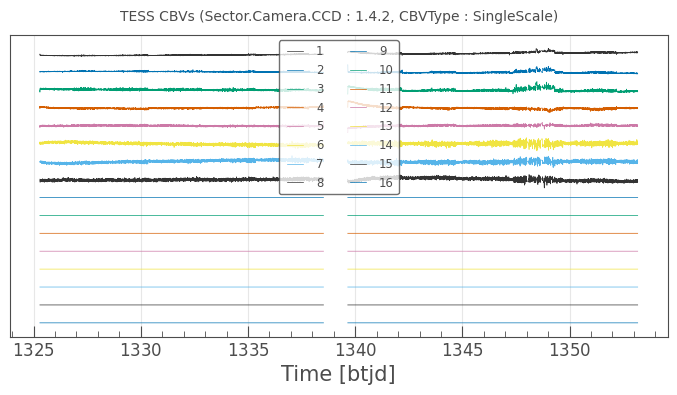

In [ ]:
cbvs.plot();

In [ ]:
from lightkurve.correctors import CBVCorrector
cbvCorrector = CBVCorrector(lc, cbvs)

In [ ]:
cbvCorrector.cbvs

[TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType : SingleScale, nCBVS : 16,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType.Band: MultiScale.1, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType.Band: MultiScale.2, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType.Band: MultiScale.3, nCBVs : 7,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType : Spike, nCBVS : 5]

In [ ]:
# Select which CBVs to use in the correction
cbv_type = ['SingleScale', 'Spike']
# Select which CBV indices to use
# Use the first 8 SingleScale and all Spike CBVS
cbv_indices = [np.arange(1,9), 'ALL']


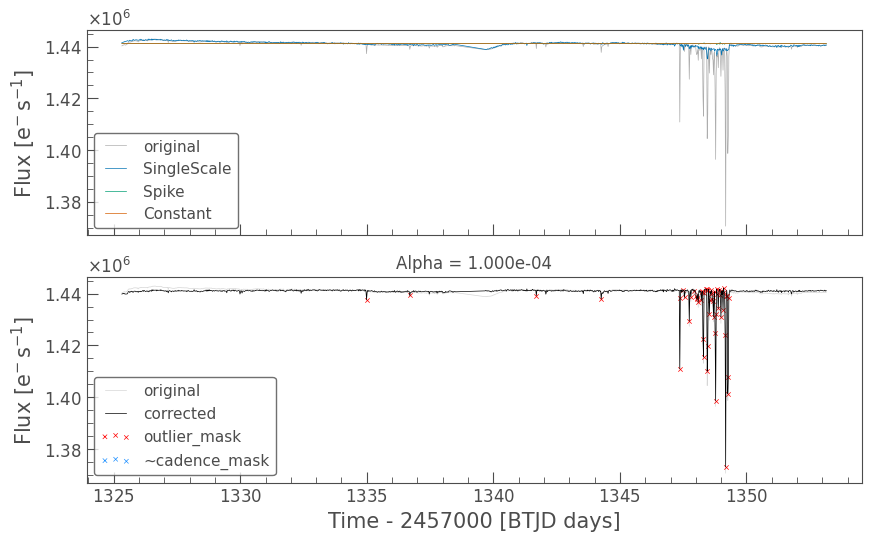

In [ ]:
# utilizando el metodo corrector correct_gaussian_prior y un alpha = 1e-4
cbvCorrector.correct_gaussian_prior (cbv_type=cbv_type, cbv_indices=cbv_indices, alpha=1e-4);
cbvCorrector.diagnose();
coreccion_1 = cbvcorrector.copy()


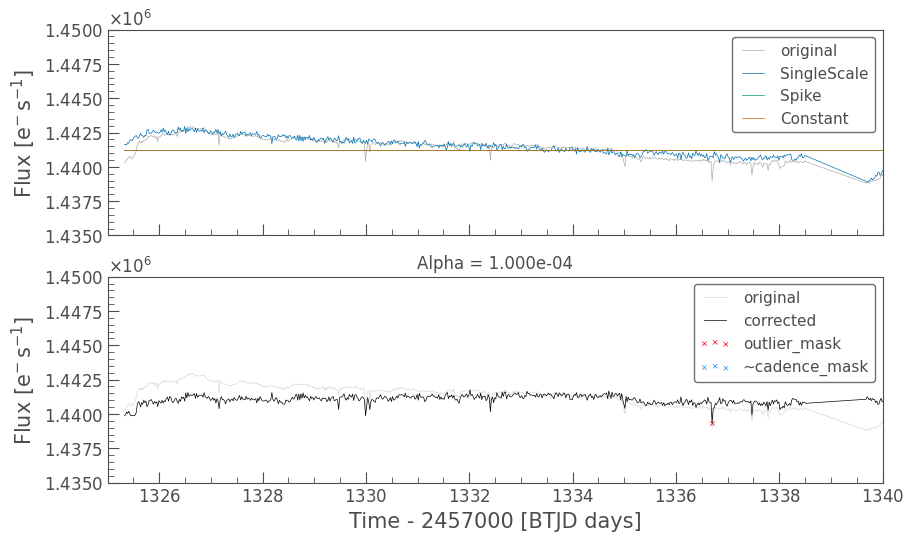

In [ ]:
pltAxis = cbvCorrector.diagnose()
pltAxis[0].set_xlim(1325, 1340)
pltAxis[0].set_ylim(1.435e6, 1.45e6);
pltAxis[1].set_xlim(1325, 1340)
pltAxis[1].set_ylim(1.435e6, 1.45e6);

In [ ]:
# utilizando el metodo correct para determinar el mejor valor de alpha

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/a

Optimized Over-fitting metric: 0.9960008434804385
Optimized Under-fitting metric: 0.9109297111058504
Optimized Alpha: 9.518e+03


/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/a

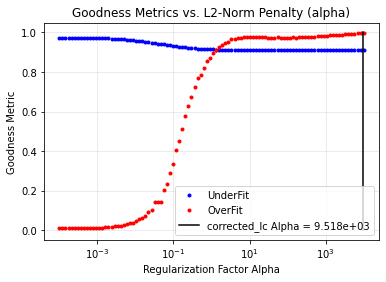

In [ ]:
cbvCorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices);

cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);

In [ ]:
# realizar un zoom

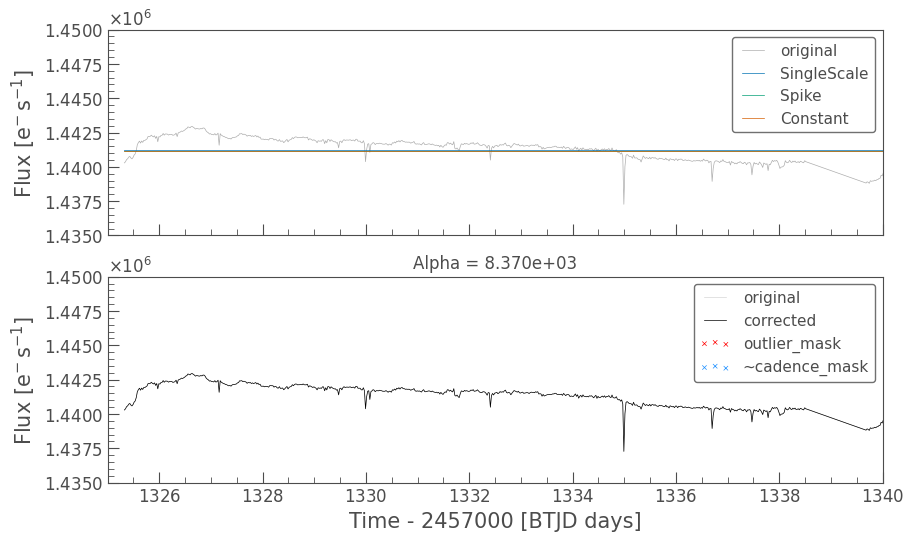

In [ ]:
pltAxis = cbvCorrector.diagnose()
pltAxis[0].set_xlim(1325, 1340)
pltAxis[0].set_ylim(1.435e6, 1.45e6);
pltAxis[1].set_xlim(1325, 1340)
pltAxis[1].set_ylim(1.435e6, 1.45e6);

In [ ]:
# para una mejor correcion entregar los valores de target_over y target_under

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/a

Optimized Over-fitting metric: 0.9955512751089709
Optimized Under-fitting metric: 0.9109260715307088
Optimized Alpha: 8.370e+03


/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/a

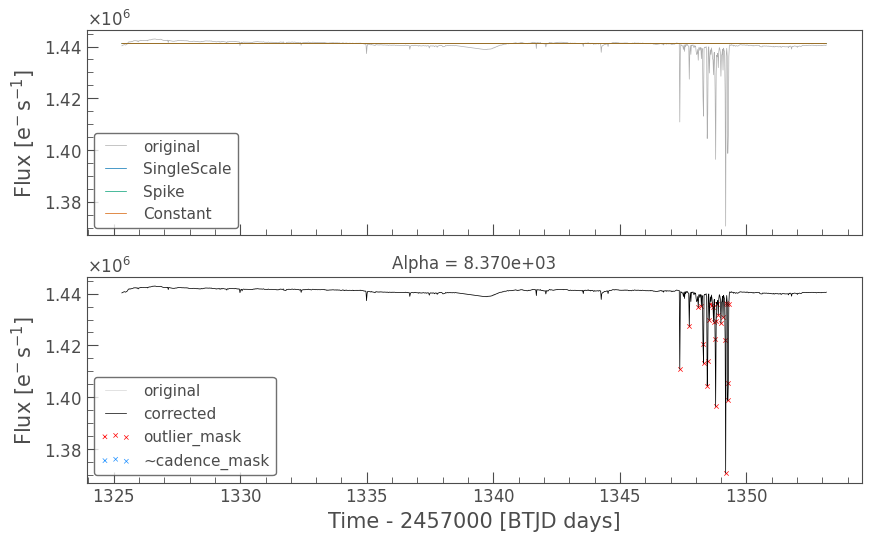

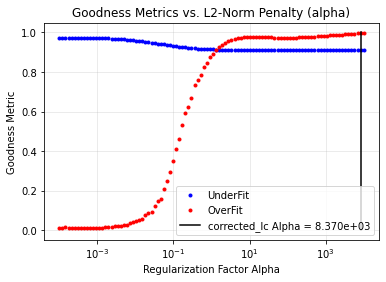

In [ ]:
cbvCorrector.correct(cbv_type=cbv_type,
                     cbv_indices=cbv_indices,
                     target_over_score=0.9,
                     target_under_score=0.5)
cbvCorrector.diagnose();
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);

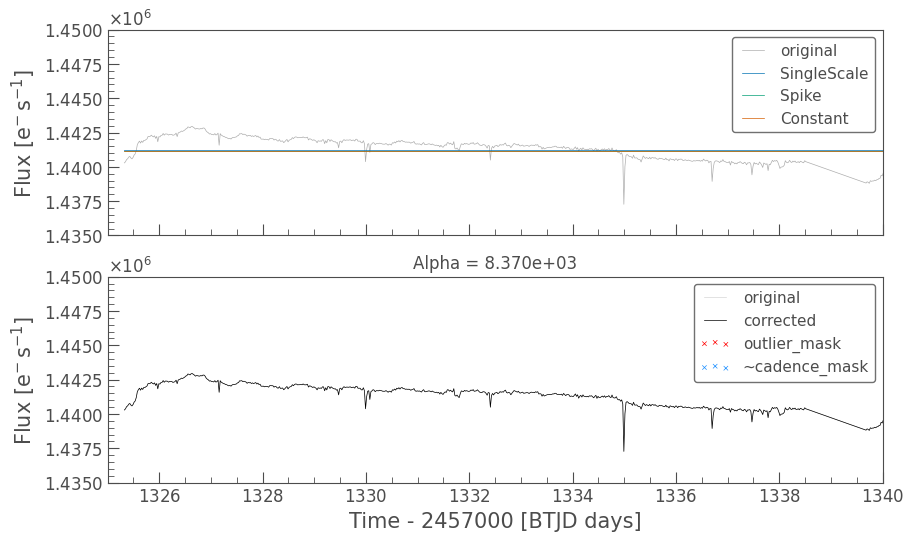

In [ ]:
pltAxis = cbvCorrector.diagnose()
pltAxis[0].set_xlim(1325, 1340)
pltAxis[0].set_ylim(1.435e6, 1.45e6);
pltAxis[1].set_xlim(1325, 1340)
pltAxis[1].set_ylim(1.435e6, 1.45e6);

In [ ]:
# uilizando un metodo correct_elasticnet

In [ ]:
cbvCorrector.cbvs

[TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType : SingleScale, nCBVS : 16,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType.Band: MultiScale.1, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType.Band: MultiScale.2, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType.Band: MultiScale.3, nCBVs : 7,
 TESS CBVs, Sector.Camera.CCD : 1.4.2, CBVType : Spike, nCBVS : 5]

In [ ]:
# Select which CBVs to use in the correction
cbv_type = ['MultiScale.2']
# Select which CBV indices to use
# Use the first 8 SingleScale and all Spike CBVS
cbv_indices = np.arange(1, 9) #[np.arange(1,9)]


In [ ]:
cbvCorrector.correct_elasticnet(cbv_type=cbv_type, cbv_indices=cbv_indices, alpha=1.0e-7, l1_ratio=0.5);
cbvCorrector.diagnose();


AssertionError: ignored

In [ ]:
#zoom curva anterior no parece ser una buena correcion 

(1435000.0, 1450000.0)

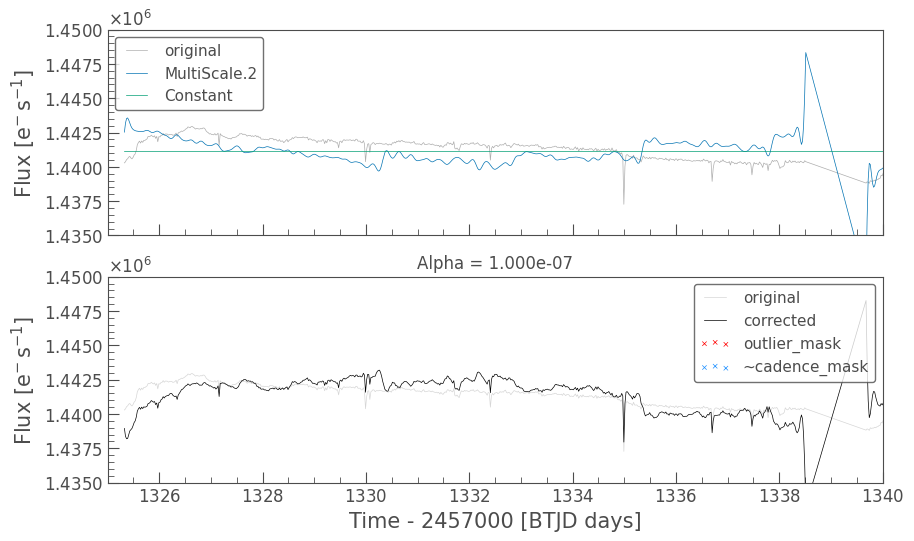

In [ ]:
pltAxis = cbvCorrector.diagnose()
pltAxis[0].set_xlim(1325, 1340)
pltAxis[0].set_ylim(1.435e6, 1.45e6);
pltAxis[1].set_xlim(1325, 1340)
pltAxis[1].set_ylim(1.435e6, 1.45e6)

In [ ]:
# sobre la cuurva anterior se realiza una nueva correcion del mismo tipo elasticnet pero con el tipo de cbv spike, no se obserban cambios

In [ ]:
# Set the corrected LC as the initial LC in a new CBVCorrector object before moving to the next correction.
# You could instead just reassign to the first cbvCorrector object, if you do not wish to save the original.
cbvCorrectorIter2 = cbvCorrector.copy()
cbvCorrectorIter2.lc = cbvCorrectorIter2.corrected_lc.copy()


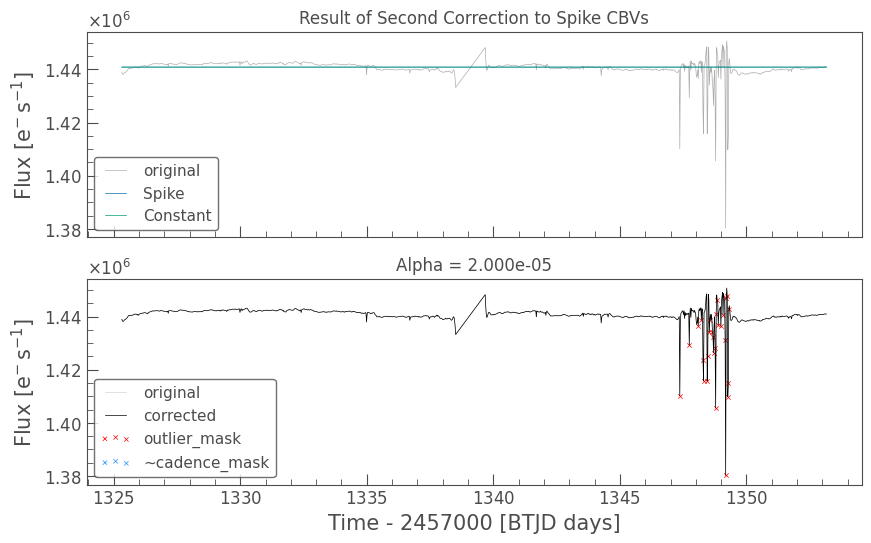

In [ ]:

# Fit to the Spike Basis Vectors, using an L1-Norm term.
cbvCorrectorIter2.correct_elasticnet(cbv_type=['Spike'], cbv_indices=['ALL'], alpha=2.0e-5, l1_ratio=0.7)
ax = cbvCorrectorIter2.diagnose()
ax[0].set_title('Result of Second Correction to Spike CBVs');

In [ ]:
# se utiliza otro metodo Matrices de diseño externas

In [ ]:
from lightkurve.correctors import DesignMatrix

In [ ]:
lc = tpf.to_lightcurve(aperture_mask=mask)

In [ ]:
dm = DesignMatrix(tpf.flux[:, ~mask], name='pixel regressors').pca(5).append_constant()

In [ ]:
cbvcorrector = CBVCorrector(lc, interpolate_cbvs=True)

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Over-fitting metric: 0.0010210322592947895
CDPP: 42.22022161858667 ppm


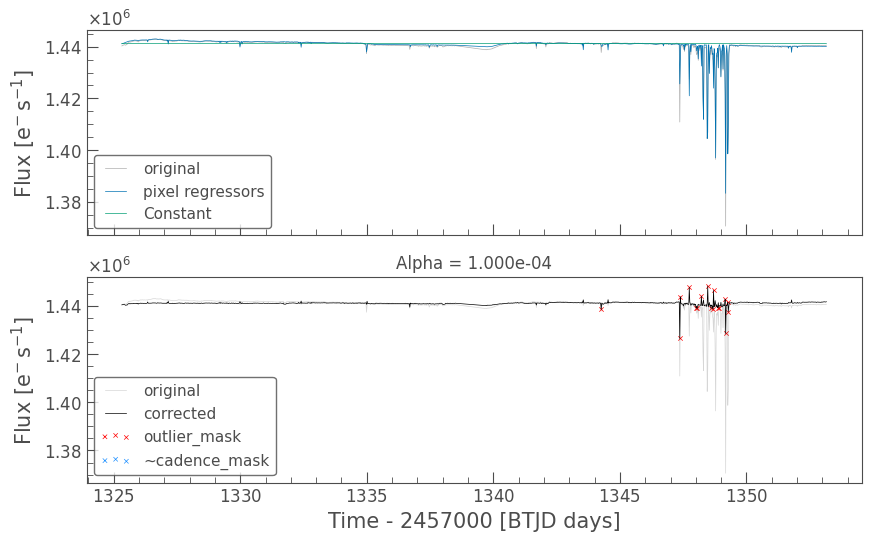

In [ ]:
cbvcorrector.correct_gaussian_prior(cbv_type=None, cbv_indices=None, ext_dm=dm, alpha=1e-4)
cbvcorrector.diagnose()

print('Over-fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_just_pixel_dm = cbvcorrector.corrected_lc

In [ ]:
# adicionar una correcion de tipo gausiana con cbv tipo multiescale, aparecen valores sobre la curva no parece ser una buena correcion

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Over-fitting metric: 4.198391101953754e-06
CDPP: 26.59598853278074 ppm


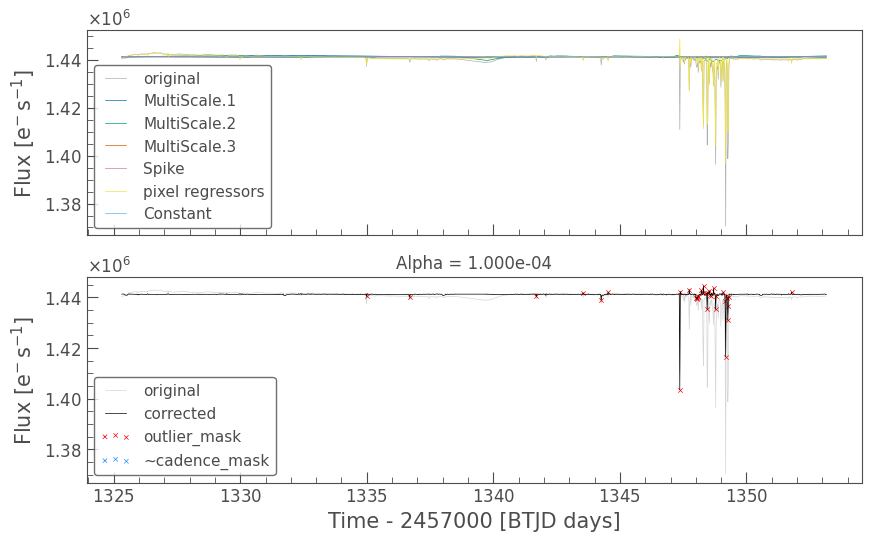

In [ ]:
cbv_type = ['MultiScale.1', 'MultiScale.2','MultiScale.3','Spike']
cbv_indices = [np.arange(1,9), np.arange(1,9), np.arange(1,9), 'ALL']
cbvcorrector.correct_gaussian_prior(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm, alpha=1e-4)
cbvcorrector.diagnose()
print('Over-fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_joint_fit = cbvcorrector.corrected_lc

In [ ]:
# a la matriz de diseño esta vez agregar un correccion tipo correct con cbv tipo  spike y single dando valores limites de alpha, la correcion parece ser buena

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/a

Optimized Over-fitting metric: 1.2015646521728006e-05
Optimized Alpha: 7.928e-03


/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/a

CDPP: 29.794196410629407 ppm


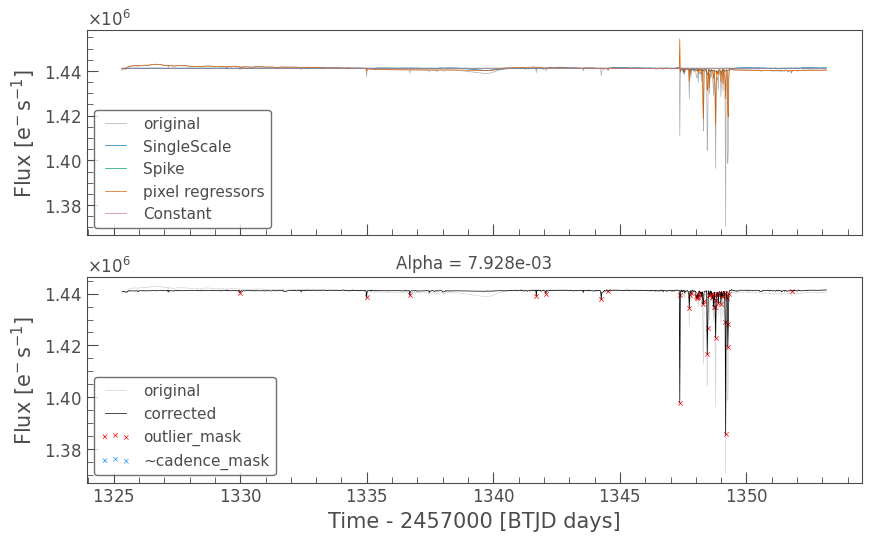

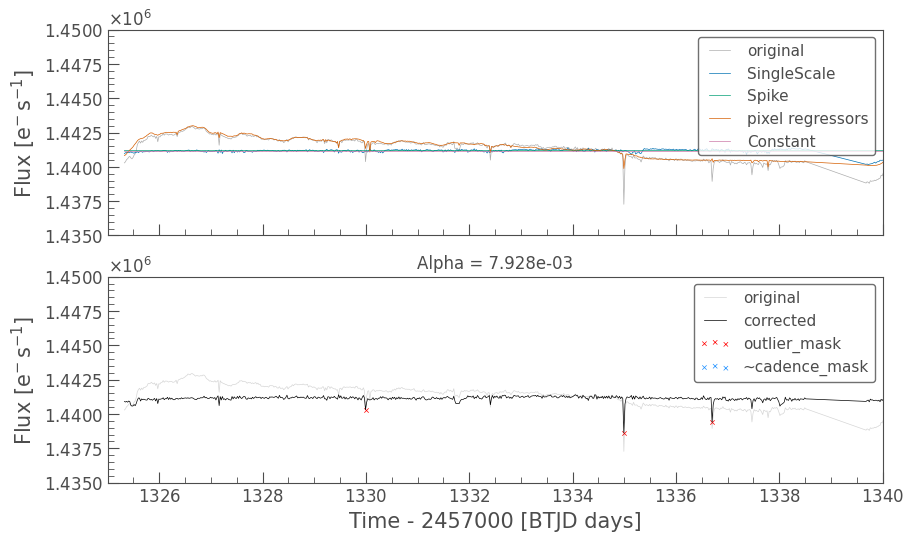

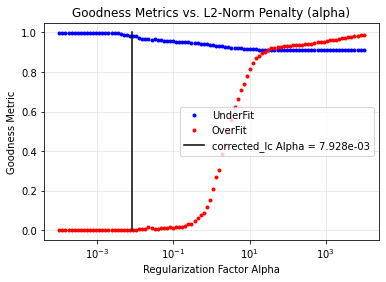

In [ ]:
# Optimize the fit but ignore the under-fitting metric and set bounds on the alpha parameter.
cbvcorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm, alpha_bounds=[1e-6, 1e-2], target_over_score=0.8, target_under_score=-1)
cbvcorrector.diagnose();
pltAxis = cbvcorrector.diagnose()
pltAxis[0].set_xlim(1325, 1340)
pltAxis[0].set_ylim(1.435e6, 1.45e6);
pltAxis[1].set_xlim(1325, 1340)
pltAxis[1].set_ylim(1.435e6, 1.45e6)
cbvcorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm);
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
correcter_2 = cbvcorrector.corrected_lc

(1325.0, 1340.0)

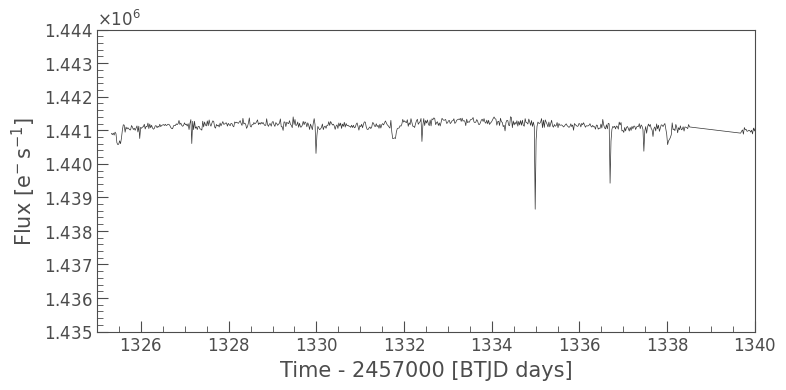

In [ ]:
# zomm curva anterior

from matplotlib import pyplot as plt

correcter_2.plot();
plt.ylim(1.435e6,1.444e6)
plt.xlim(1325,1340)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# curva de luz original versus ultima correcion

(1325.0, 1340.0)

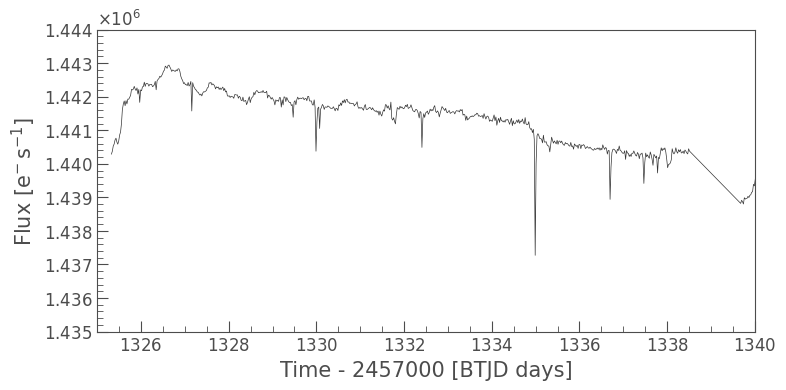

In [ ]:
lc.plot();
plt.ylim(1.435e6,1.444e6)
plt.xlim(1325,1340)

(1325.0, 1340.0)

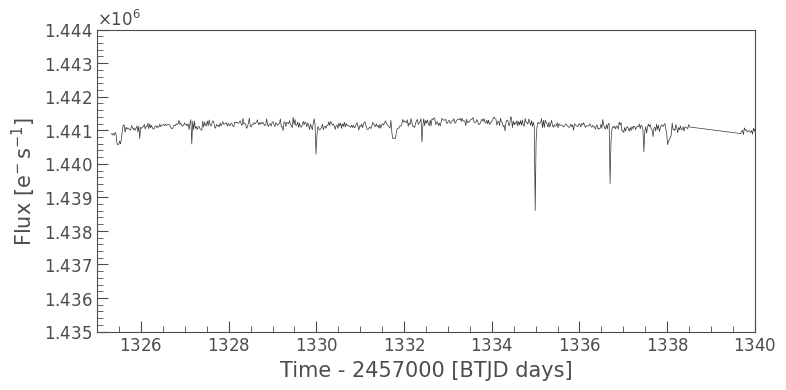

In [ ]:
correcter_2.plot();
plt.ylim(1.435e6,1.444e6)
plt.xlim(1325,1340)


In [ ]:
pg = correcter_2.to_periodogram(oversample_factor=1)